In [339]:
import pandas as pd
import numpy as np

In [340]:
dates=pd.date_range('2016-05-01','2016-05-07')
dates

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07'],
              dtype='datetime64[ns]', freq='D')

In [341]:
tmp1 = pd.Series([80,92,82,85,97,84,78],index=dates)
tmp1

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, dtype: int64

In [342]:
tmp2 = pd.Series(np.random.randint(60,101,size=7),index=dates)

tmp2

2016-05-01    70
2016-05-02    68
2016-05-03    82
2016-05-04    67
2016-05-05    86
2016-05-06    70
2016-05-07    99
Freq: D, dtype: int32

In [343]:
# exam = pd.DataFrame(pd.concat([tmp1,tmp2],axis=1))
# exam.columns = ['Math','Philoshophy']
# exam
exam = pd.DataFrame({
        'Math' : tmp1,
        'Philosophy' : tmp2
})
exam

,Math,Philosophy
2016-05-01,80,70
2016-05-02,92,68
2016-05-03,82,82
2016-05-04,85,67
2016-05-05,97,86
2016-05-06,84,70
2016-05-07,78,99


In [344]:
exam.loc['2016-05-05']
exam['Philosophy'][[3,5,6]]

2016-05-04    67
2016-05-06    70
2016-05-07    99
Name: Philosophy, dtype: int32

In [345]:
exam['difference'] = exam['Math']-exam['Philosophy']
exam

,Math,Philosophy,difference
2016-05-01,80,70,10
2016-05-02,92,68,24
2016-05-03,82,82,0
2016-05-04,85,67,18
2016-05-05,97,86,11
2016-05-06,84,70,14
2016-05-07,78,99,-21


In [346]:
exam.rename(columns={'Math' : 'Mathmatics', 'difference' : 'diff'},inplace= True)
exam

,Mathmatics,Philosophy,diff
2016-05-01,80,70,10
2016-05-02,92,68,24
2016-05-03,82,82,0
2016-05-04,85,67,18
2016-05-05,97,86,11
2016-05-06,84,70,14
2016-05-07,78,99,-21


In [347]:
exam.drop(columns='diff',inplace=True)
exam


,Mathmatics,Philosophy
2016-05-01,80,70
2016-05-02,92,68
2016-05-03,82,82
2016-05-04,85,67
2016-05-05,97,86
2016-05-06,84,70
2016-05-07,78,99


In [348]:
exam[(exam.index == '2016-05-03')|(exam.index == '2016-05-04')]

,Mathmatics,Philosophy
2016-05-03,82,82
2016-05-04,85,67


In [349]:
exam[(exam.Mathmatics>=85)&(exam.index<'2016-05-05')]


,Mathmatics,Philosophy
2016-05-02,92,68
2016-05-04,85,67


In [350]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

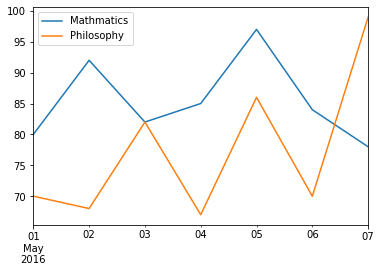

In [351]:
exam.plot()

<AxesSubplot:title={'center':'Score'}>

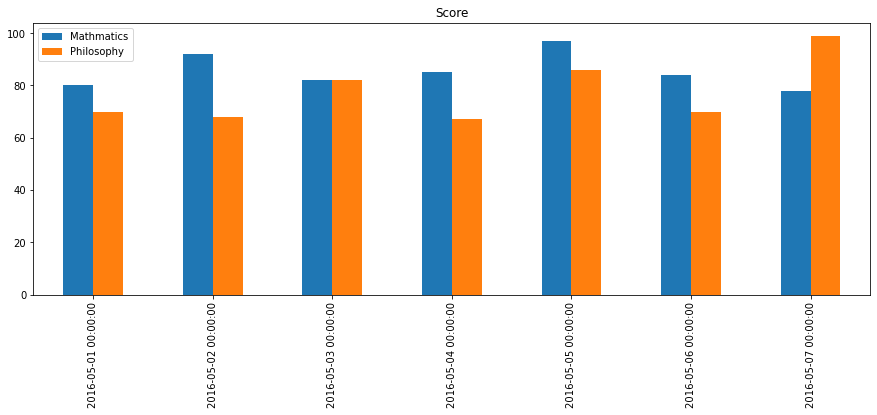

In [352]:
exam.plot(title='Score',figsize=(15,5),kind='bar')

In [353]:
movies = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv')
movies.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [354]:
movies[movies.duration >= 200]

booleans = []
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)
is_long = pd.Series(booleans)
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [355]:
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')]
movies[movies.genre.isin(['Crime','Drama','Action'])]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."
972,7.4,Blue Valentine,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John..."
973,7.4,The Cider House Rules,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


In [356]:
import matplotlib.pyplot as plt
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [357]:
drinks.beer_servings.mean()

106.16062176165804

In [358]:
drinks[drinks.continent == 'Africa'].wine_servings.mean()

16.264150943396228

In [359]:
drinks.groupby('continent').beer_servings.max()
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [360]:
drinks.groupby('continent').beer_servings.agg(['count','mean','min','max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


<AxesSubplot:xlabel='continent'>

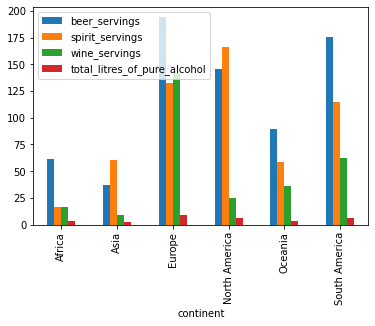

In [361]:
drinks.groupby('continent').mean().plot(kind='bar')

<AxesSubplot:xlabel='continent'>

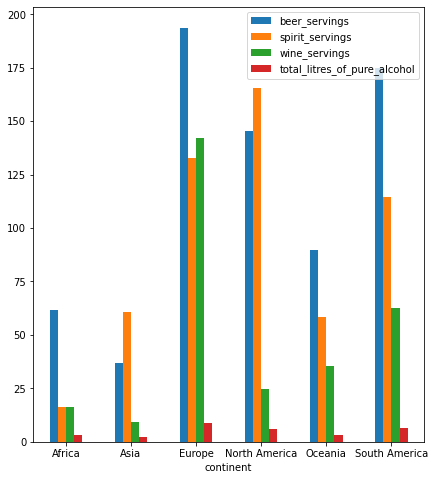

In [362]:
a = drinks.groupby('continent').mean()
a.total_litres_of_pure_alcohol
a.plot(figsize=(7,8),kind='bar',rot=0)

<AxesSubplot:xlabel='country'>

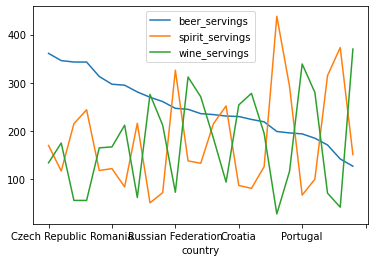

In [363]:
a = drinks[drinks.total_litres_of_pure_alcohol>10].set_index('country')
a = a.iloc[:,:3]

a_b = a.sort_values(by='beer_servings',ascending=False)
a_b.plot()

<AxesSubplot:xlabel='country'>

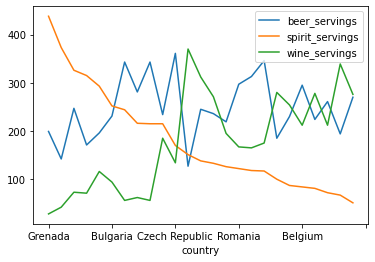

In [364]:
a_s = a.sort_values(by='spirit_servings',ascending=False)
a_s.plot()


<AxesSubplot:xlabel='country'>

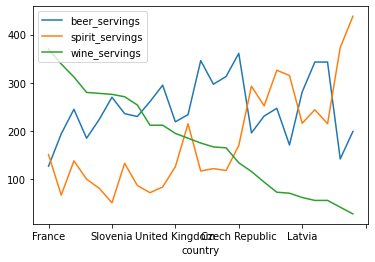

In [365]:
a_w = a.sort_values(by='wine_servings',ascending=False)
a_w.plot()

In [366]:
a.corr()

,beer_servings,spirit_servings,wine_servings
beer_servings,1.000000,-0.266387,-0.251031
spirit_servings,-0.266387,1.000000,-0.787551
wine_servings,-0.251031,-0.787551,1.000000


<AxesSubplot:xlabel='country'>

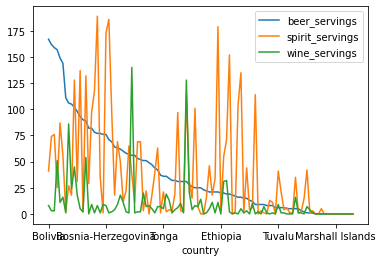

In [367]:
b = drinks[drinks.total_litres_of_pure_alcohol< 5].set_index('country')
b = b.iloc[:,:3]

b_b = b.sort_values(by='beer_servings',ascending=False)
b_b.plot()

In [368]:
b.corr()

,beer_servings,spirit_servings,wine_servings
beer_servings,1.000000,0.366440,0.256707
spirit_servings,0.366440,1.000000,0.197742
wine_servings,0.256707,0.197742,1.000000


In [369]:
drinks['d_sum'] = drinks['beer_servings']+drinks['spirit_servings']+drinks['wine_servings']

In [376]:
c = drinks[drinks.d_sum > 400].set_index('country')
c = c.iloc[:,:3]
c.corr()

,beer_servings,spirit_servings,wine_servings
beer_servings,1.00000,-0.191720,-0.259290
spirit_servings,-0.19172,1.000000,-0.532831
wine_servings,-0.25929,-0.532831,1.000000


<AxesSubplot:xlabel='country'>

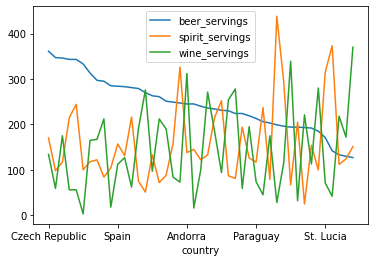

In [377]:
c_b = c.sort_values(by='beer_servings',ascending=False)
c_b.plot()

In [371]:
d = drinks[drinks.d_sum < 300].set_index('country')
d = d.iloc[:,:3]
d.corr()

,beer_servings,spirit_servings,wine_servings
beer_servings,1.000000,0.308986,0.242934
spirit_servings,0.308986,1.000000,0.145457
wine_servings,0.242934,0.145457,1.000000


In [372]:
drinks.iloc[:,1:4].corr()

,beer_servings,spirit_servings,wine_servings
beer_servings,1.000000,0.458819,0.527172
spirit_servings,0.458819,1.000000,0.194797
wine_servings,0.527172,0.194797,1.000000
